
# 🏪 Store Sales Time Series Forecasting 📈

### 1. Introduction
#### 1.1. Problem Statement
#### 1.2. Data Description
#### 1.3. Objective
### 2. Data Exploration
#### 2.1. Importing Libraries
#### 2.2. Loading Data
#### 2.3. Data Exploration
##### 2.3.1. Univariant Analysis
##### 2.3.2. Bivariant Analysis
##### 2.3.3. Multivariant Analysis
### 3. Data Cleaning
### 4. Feature Engineering
### 5. Data Preprocessing
#### 5.1. Data Transformation
### 6. Model Building
#### 6.1. Baseline Model
### 7. Model Evaluation


We have already covered the data exploration and data cleaning parts in the previous notebook. In this notebook, we will be performing the following tasks:
* Feature Engineering
* Data Preprocessing

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import datetime
import os
import warnings

sns.set_context('notebook', font_scale=1.5)
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../../../Kaggle_input/input/store_sales_time_series_forecasting/train_with_features.csv')
# test = pd.read_csv('../../../Kaggle_input/input/store_sales_time_series_forecasting/test_with_features.csv')

In [3]:
train.head()

,date,store_nbr,family,id,sales,onpromotion,train_test_id,city,state,type,...,quarter,week_of_year,day_of_year,day_of_month,day_of_week,is_weekend,is_wage_day,is_year_end,is_local_holiday,is_reg_holiday
0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,0.0,train,Quito,Pichincha,D,...,1,1,1,1,1,False,False,False,0,0
1,2013-01-01,1,BABY CARE,1.0,0.0,0.0,train,Quito,Pichincha,D,...,1,1,1,1,1,False,False,False,0,0
2,2013-01-01,1,BEAUTY,2.0,0.0,0.0,train,Quito,Pichincha,D,...,1,1,1,1,1,False,False,False,0,0
3,2013-01-01,1,BEVERAGES,3.0,0.0,0.0,train,Quito,Pichincha,D,...,1,1,1,1,1,False,False,False,0,0
4,2013-01-01,1,BOOKS,4.0,0.0,0.0,train,Quito,Pichincha,D,...,1,1,1,1,1,False,False,False,0,0


## 5. Data Preprocessing

In [4]:
# Function to encode categorical variables, we will use scikit-learn's LabelEncoder for label encoding and pandas get_dummies for one-hot encoding
from sklearn.preprocessing import LabelEncoder
def encode_cat(df, col, encoding_type):
    if encoding_type == 'label':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
    elif encoding_type == 'onehot':
        df = pd.get_dummies(df, columns=[col], prefix=[col])
    return df

In [5]:
train.dtypes

date                    object
store_nbr                int64
family                  object
id                     float64
sales                  float64
onpromotion            float64
train_test_id           object
city                    object
state                   object
type                    object
cluster                  int64
transactions           float64
type_local              object
type_national           object
type_reg                object
dcoilwtico             float64
is_national_holiday      int64
sales_1_year_ago       float64
sales_1_month_ago      float64
sales_2_week_ago       float64
sales_1_week_ago       float64
year                     int64
month                    int64
quarter                  int64
week_of_year             int64
day_of_year              int64
day_of_month             int64
day_of_week              int64
is_weekend                bool
is_wage_day               bool
is_year_end               bool
is_local_holiday         int64
is_reg_h

In [6]:
train_encoded = train.copy()
train_encoded = encode_cat(train_encoded, 'family', 'label')
train_encoded = encode_cat(train_encoded, 'city', 'label')
train_encoded = encode_cat(train_encoded, 'state', 'label')
train_encoded = encode_cat(train_encoded, 'type', 'onehot')
train_encoded = encode_cat(train_encoded, 'type_local', 'onehot')
train_encoded = encode_cat(train_encoded, 'type_national', 'onehot')
train_encoded = encode_cat(train_encoded, 'type_reg', 'onehot')
train_encoded.head()

,date,store_nbr,family,id,sales,onpromotion,train_test_id,city,state,cluster,...,type_local_Transfer,type_local_Work Day,type_national_Additional,type_national_Bridge,type_national_Event,type_national_Holiday,type_national_Transfer,type_national_Work Day,type_reg_Holiday,type_reg_Work Day
0,2013-01-01,1,0,0.0,0.0,0.0,train,18,12,13,...,0,1,0,0,0,1,0,0,0,1
1,2013-01-01,1,1,1.0,0.0,0.0,train,18,12,13,...,0,1,0,0,0,1,0,0,0,1
2,2013-01-01,1,2,2.0,0.0,0.0,train,18,12,13,...,0,1,0,0,0,1,0,0,0,1
3,2013-01-01,1,3,3.0,0.0,0.0,train,18,12,13,...,0,1,0,0,0,1,0,0,0,1
4,2013-01-01,1,4,4.0,0.0,0.0,train,18,12,13,...,0,1,0,0,0,1,0,0,0,1


In [7]:
# train.sales = train.sales.apply(lambda x: np.log(x) if x>0 else x)
# train_encoded.onpromotion = train_encoded.onpromotion.apply(lambda x: np.log(x) if x>0 else x)

In [8]:
# train.sales = train.sales.apply(lambda x: np.log(x) if x>0 else x)
# train_encoded.sales = train_encoded.sales.apply(lambda x: np.log(x) if x>0 else x)

In [9]:
train_encoded.columns

Index(['date', 'store_nbr', 'family', 'id', 'sales', 'onpromotion',
       'train_test_id', 'city', 'state', 'cluster', 'transactions',
       'dcoilwtico', 'is_national_holiday', 'sales_1_year_ago',
       'sales_1_month_ago', 'sales_2_week_ago', 'sales_1_week_ago', 'year',
       'month', 'quarter', 'week_of_year', 'day_of_year', 'day_of_month',
       'day_of_week', 'is_weekend', 'is_wage_day', 'is_year_end',
       'is_local_holiday', 'is_reg_holiday', 'type_A', 'type_B', 'type_C',
       'type_D', 'type_E', 'type_local_Additional', 'type_local_Holiday',
       'type_local_Transfer', 'type_local_Work Day',
       'type_national_Additional', 'type_national_Bridge',
       'type_national_Event', 'type_national_Holiday',
       'type_national_Transfer', 'type_national_Work Day', 'type_reg_Holiday',
       'type_reg_Work Day'],
      dtype='object')

* Let's separate the test data from the train data.

In [10]:
train_encoded[train_encoded.train_test_id == 'train'].shape

(3008016, 46)

In [11]:
test_encoded = train_encoded[train_encoded.train_test_id == 'test'].drop(columns=["train_test_id"])
train_encoded = train_encoded[train_encoded.train_test_id == 'train'].drop(columns=['train_test_id'])

In [12]:
# test_encoded = test.drop(columns=['id']).copy()
# test_encoded = encode_cat(test_encoded, 'family', 'label')
# test_encoded = encode_cat(test_encoded, 'city', 'label')
# test_encoded = encode_cat(test_encoded, 'state', 'label')
# test_encoded = encode_cat(test_encoded, 'type', 'label')
# test_encoded = encode_cat(test_encoded, 'type_local', 'onehot')
# test_encoded = encode_cat(test_encoded, 'type_national', 'onehot')
# test_encoded = encode_cat(test_encoded, 'type_reg', 'onehot')
test_encoded.shape

(28512, 45)

In [13]:
# test.onpromotion = test.onpromotion.apply(lambda x: np.log(x) if x > 0 else x)

In [14]:
test_encoded.columns

Index(['date', 'store_nbr', 'family', 'id', 'sales', 'onpromotion', 'city',
       'state', 'cluster', 'transactions', 'dcoilwtico', 'is_national_holiday',
       'sales_1_year_ago', 'sales_1_month_ago', 'sales_2_week_ago',
       'sales_1_week_ago', 'year', 'month', 'quarter', 'week_of_year',
       'day_of_year', 'day_of_month', 'day_of_week', 'is_weekend',
       'is_wage_day', 'is_year_end', 'is_local_holiday', 'is_reg_holiday',
       'type_A', 'type_B', 'type_C', 'type_D', 'type_E',
       'type_local_Additional', 'type_local_Holiday', 'type_local_Transfer',
       'type_local_Work Day', 'type_national_Additional',
       'type_national_Bridge', 'type_national_Event', 'type_national_Holiday',
       'type_national_Transfer', 'type_national_Work Day', 'type_reg_Holiday',
       'type_reg_Work Day'],
      dtype='object')

In [15]:
# Function to plot correlation between variables
def plot_corr(df, size=22):
    corr = df.corr()
#     print(corr)
    fig, ax = plt.subplots(figsize=(size, size))
    sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, cmap='crest')
    plt.show() 

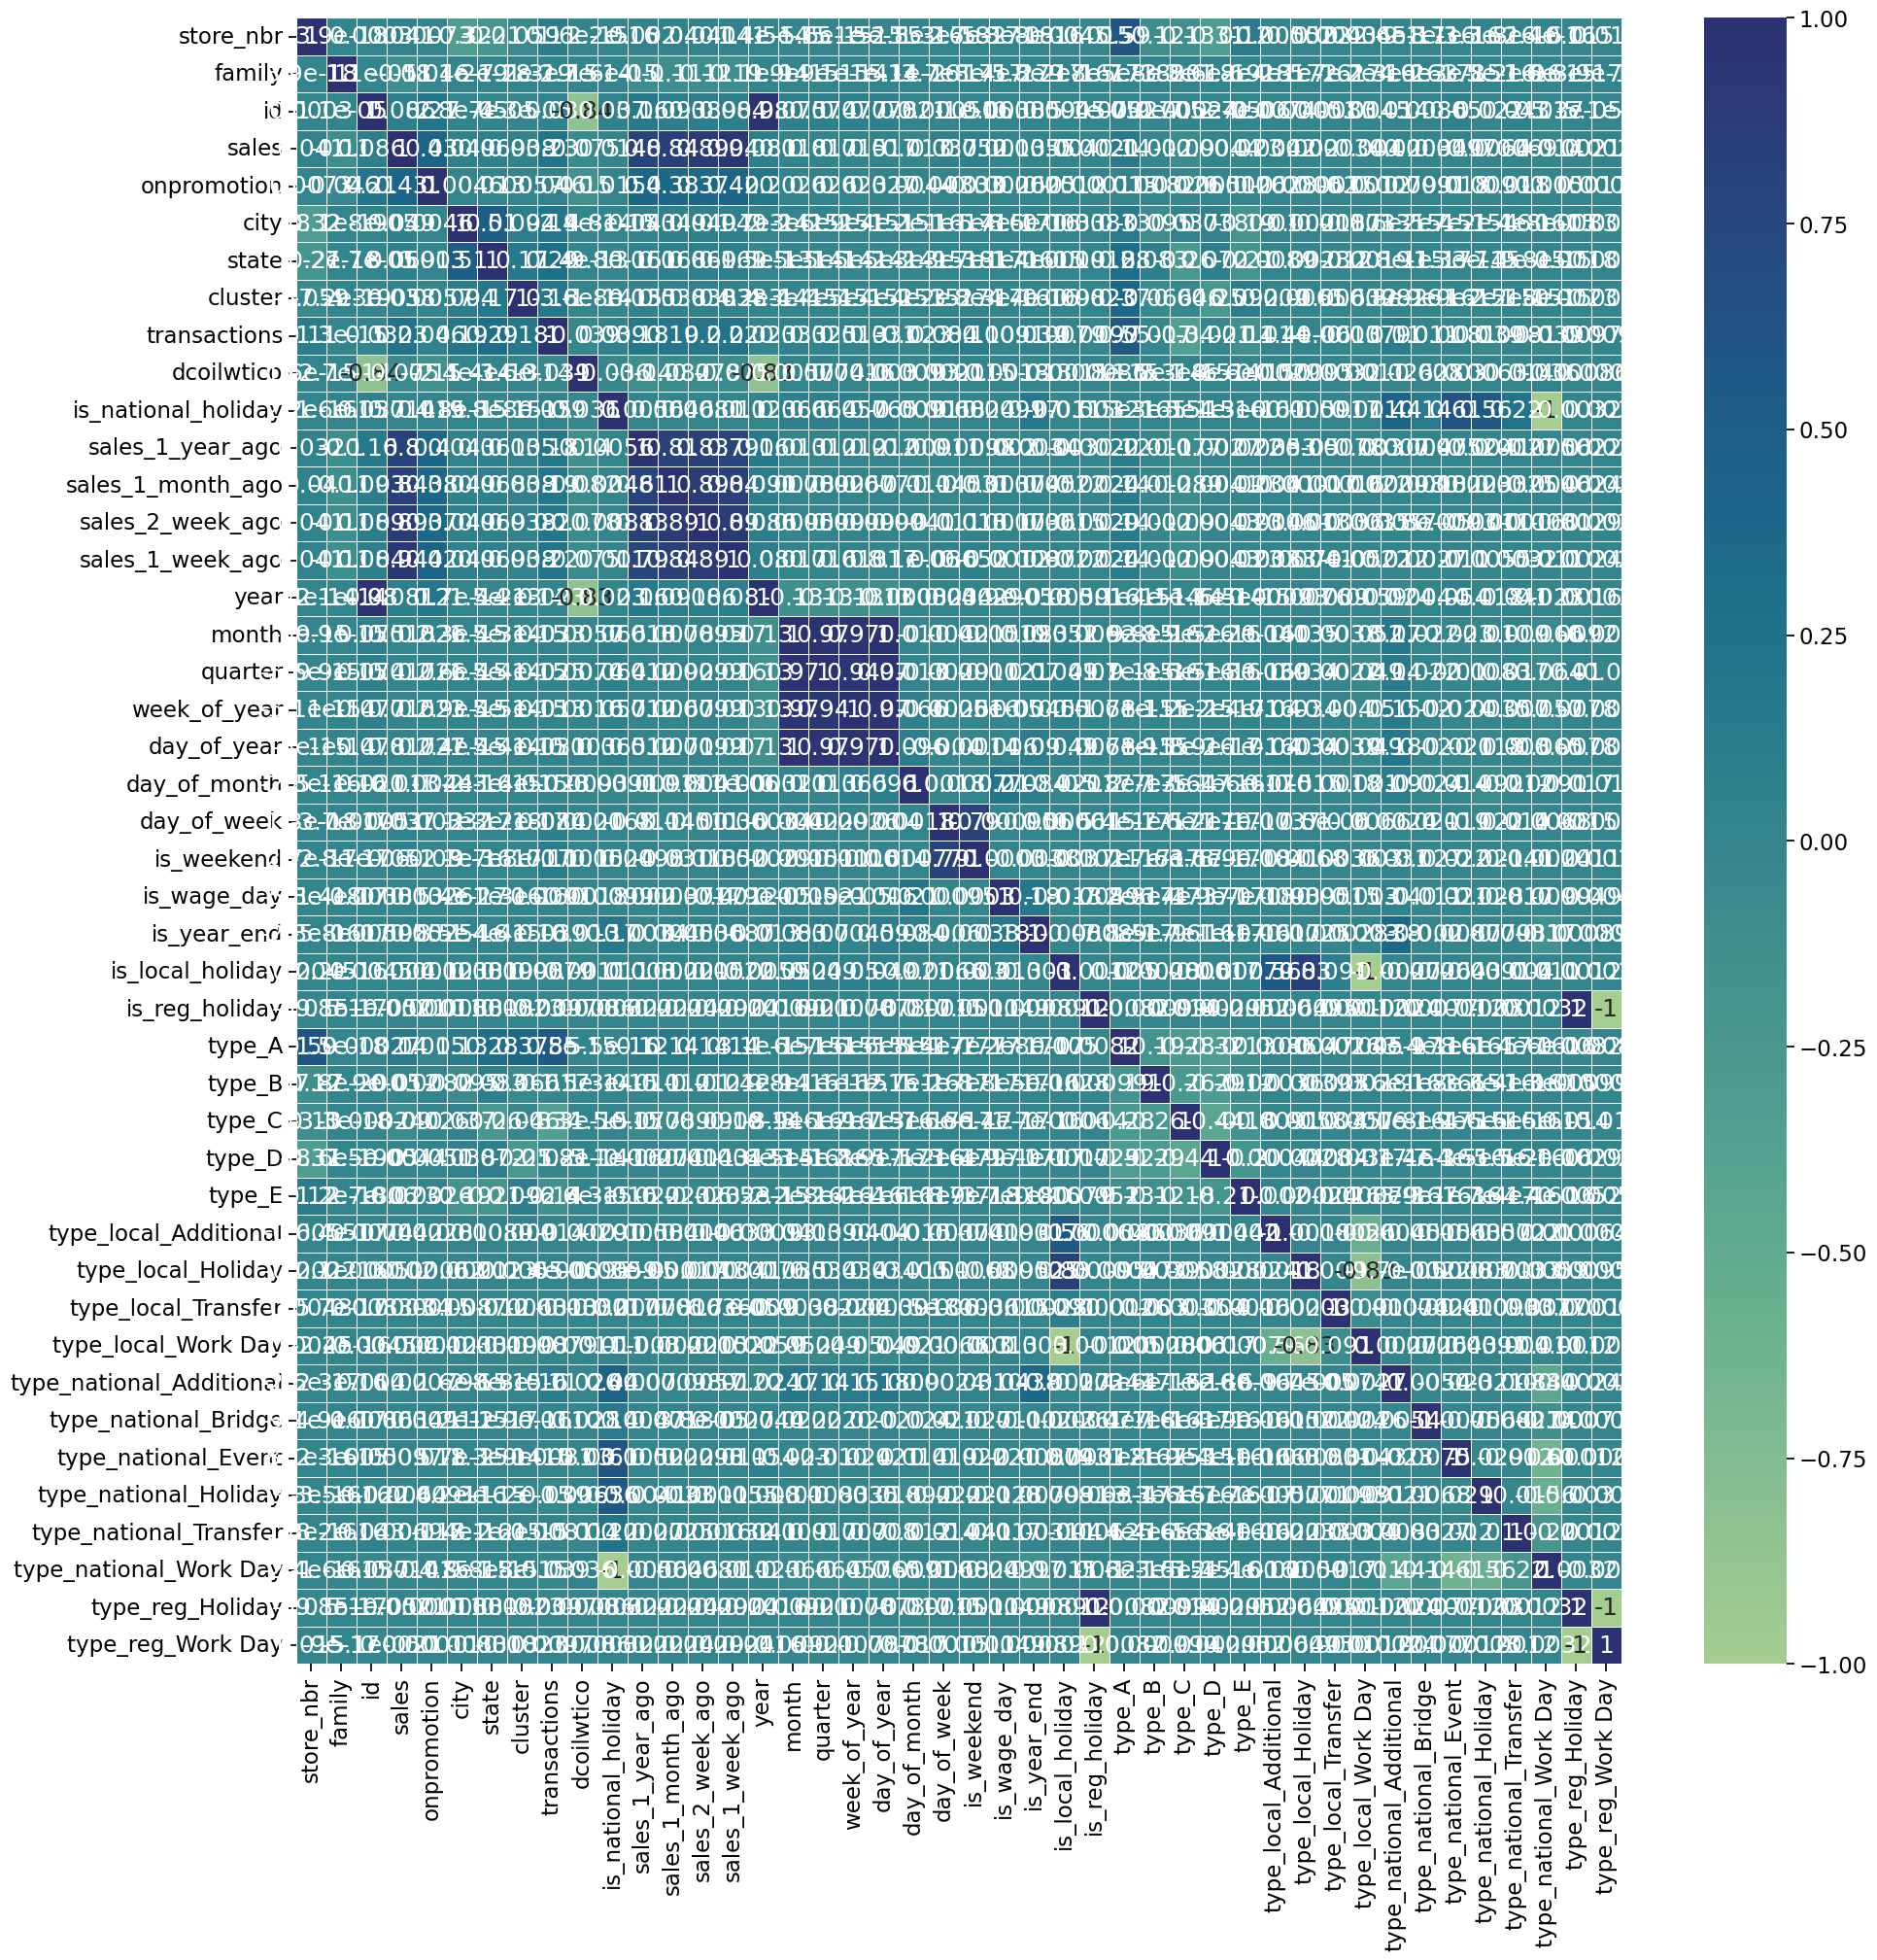

In [16]:
# Correlation between variables in the training set
plot_corr(train_encoded)

In [13]:
# Function to plot correlation of variables with the target variable as a barplot
def plot_corr_target(df, target, size=10):
    corr = df.corr()
    corr_target = corr[target]
    corr_target = corr_target.sort_values(ascending=False)
    corr_target = corr_target.drop(target)
    plt.figure(figsize=(size, size))
    corr_target.plot.barh()
    plt.show()

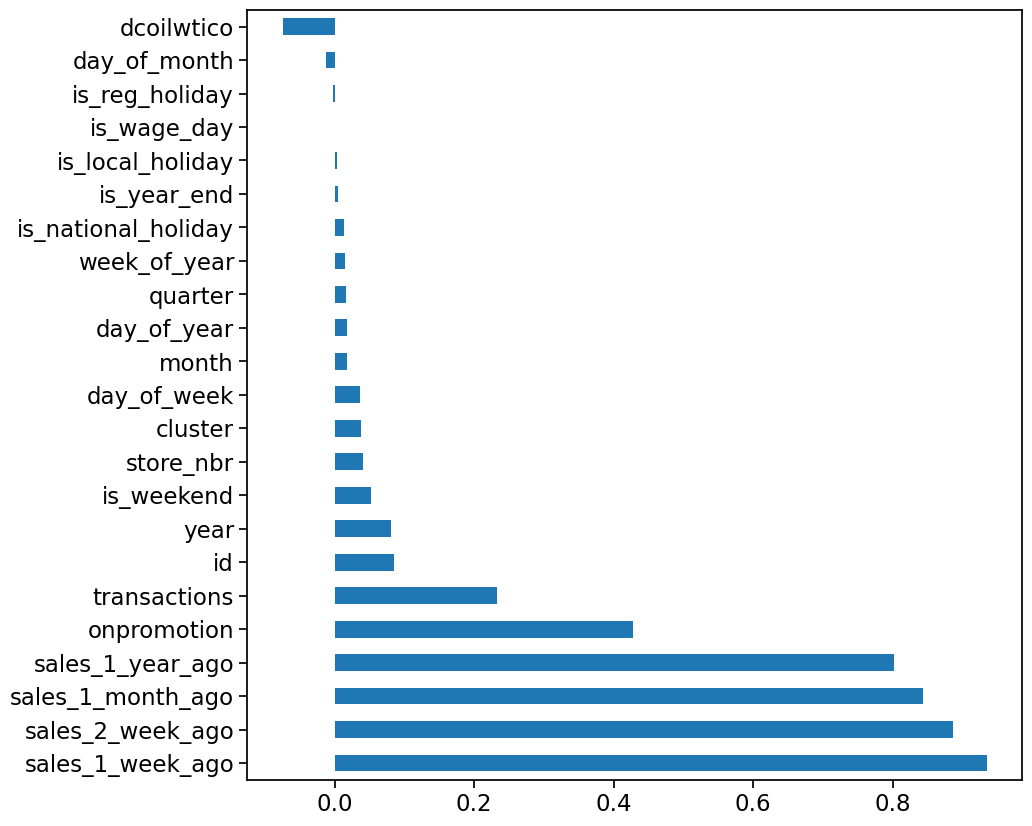

In [14]:
# Check correlation of variables with the target variable
plot_corr_target(train, 'sales')

* Let's convert date column to datetime format.

In [15]:
train_encoded.date = pd.to_datetime(train_encoded.date)
test_encoded.date = pd.to_datetime(test_encoded.date)

* Let's check for missing values in both train and test data.

In [16]:
train_encoded.isna().sum()

date                        0
store_nbr                   0
family                      0
id                          0
sales                       0
onpromotion                 0
city                        0
state                       0
cluster                     0
transactions                0
dcoilwtico                  0
is_national_holiday         0
sales_1_year_ago            0
sales_1_month_ago           0
sales_2_week_ago            0
sales_1_week_ago            0
year                        0
month                       0
quarter                     0
week_of_year                0
day_of_year                 0
day_of_month                0
day_of_week                 0
is_weekend                  0
is_wage_day                 0
is_year_end                 0
is_local_holiday            0
is_reg_holiday              0
type_A                      0
type_B                      0
type_C                      0
type_D                      0
type_E                      0
type_local

In [17]:
test_encoded.isna().sum()

date                            0
store_nbr                       0
family                          0
id                              0
sales                       28512
onpromotion                     0
city                            0
state                           0
cluster                         0
transactions                    0
dcoilwtico                      0
is_national_holiday             0
sales_1_year_ago                0
sales_1_month_ago               0
sales_2_week_ago                0
sales_1_week_ago                0
year                            0
month                           0
quarter                         0
week_of_year                    0
day_of_year                     0
day_of_month                    0
day_of_week                     0
is_weekend                      0
is_wage_day                     0
is_year_end                     0
is_local_holiday                0
is_reg_holiday                  0
type_A                          0
type_B        

* There are missing values in sales column, which is the target variable. We will drop this column from test. 

## 6. Model Building and Evaluation

In [18]:
# We will first separate the target variable from the features
y = train_encoded['sales']
x = train_encoded.drop(columns=['sales'])
x.shape, y.shape

((3008016, 44), (3008016,))

In [19]:
x.head()

,date,store_nbr,family,id,onpromotion,city,state,cluster,transactions,dcoilwtico,...,type_local_Transfer,type_local_Work Day,type_national_Additional,type_national_Bridge,type_national_Event,type_national_Holiday,type_national_Transfer,type_national_Work Day,type_reg_Holiday,type_reg_Work Day
0,2013-01-01,1,0,0.0,0.0,18,12,13,0.0,93.14,...,0,1,0,0,0,1,0,0,0,1
1,2013-01-01,1,1,1.0,0.0,18,12,13,0.0,93.14,...,0,1,0,0,0,1,0,0,0,1
2,2013-01-01,1,2,2.0,0.0,18,12,13,0.0,93.14,...,0,1,0,0,0,1,0,0,0,1
3,2013-01-01,1,3,3.0,0.0,18,12,13,0.0,93.14,...,0,1,0,0,0,1,0,0,0,1
4,2013-01-01,1,4,4.0,0.0,18,12,13,0.0,93.14,...,0,1,0,0,0,1,0,0,0,1


In [20]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler_1 = MinMaxScaler()
# scaler_2 = MinMaxScaler()
x_scaled = scaler_1.fit_transform(x.drop(columns=['date']))

# y_scaled = scaler_2.fit_transform(np.array(y).reshape(-1,1))

test_scaled = scaler_1.fit_transform(test_encoded.drop(columns=['date', 'sales']))


In [22]:
test_scaled.shape, x_scaled.shape

((28512, 43), (3008016, 43))

In [23]:
x = pd.DataFrame(x_scaled, columns = x.drop(columns=['date']).columns)
# x = pd.concat([_x, x['date']], axis=1)
# y = pd.DataFrame(y_scaled, columns = y.columns)

test_final = pd.DataFrame(test_scaled, columns = test_encoded.drop(columns=['date', 'sales']).columns)
# test_final = pd.concat([_test_final, test_encoded['date']], axis=1)

In [24]:
# Check train data after scaling
x.head()

,store_nbr,family,id,onpromotion,city,state,cluster,transactions,dcoilwtico,is_national_holiday,...,type_local_Transfer,type_local_Work Day,type_national_Additional,type_national_Bridge,type_national_Event,type_national_Holiday,type_national_Transfer,type_national_Work Day,type_reg_Holiday,type_reg_Work Day
0,0.0,0.00000,0.000000e+00,0.0,0.857143,0.8,0.75,0.0,0.792965,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.03125,3.332348e-07,0.0,0.857143,0.8,0.75,0.0,0.792965,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.06250,6.664696e-07,0.0,0.857143,0.8,0.75,0.0,0.792965,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.09375,9.997044e-07,0.0,0.857143,0.8,0.75,0.0,0.792965,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.12500,1.332939e-06,0.0,0.857143,0.8,0.75,0.0,0.792965,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [25]:
test_final.shape

(28512, 43)

In [26]:
# Importing the train test split function
# from sklearn.model_selection import train_test_split
# train_x,valid_x,train_y,valid_y = train_test_split(x,y, random_state = 50, test_size=0.3)


* Let's split the data into train and test sets. This is time series data, so we will be splitting the data based on time.

In [27]:
import math
train_len = math.ceil(x.shape[0] * 0.9)
valid_len = x.shape[0] - train_len
train_len, valid_len

(2707215, 300801)

In [28]:
train_x = x.iloc[:train_len]
train_y = y.iloc[:train_len]

valid_x = x.iloc[train_len:]
valid_y = y.iloc[train_len:]

In [29]:
train_x.shape, train_y.shape, valid_x.shape, valid_y.shape

((2707215, 43), (2707215,), (300801, 43), (300801,))

### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from math import sqrt

In [31]:
def rmsle(actual, preds):
    for i in range(0,len(preds)):
        if preds[i]<0:
            preds[i] = 0
        else:
            pass
    
    error = (sqrt(mean_squared_log_error(actual, preds)))
    return error

In [33]:
#training the model
model = LinearRegression()
model.fit(train_x, train_y)
preds = model.predict(valid_x)

# results
score = rmsle(valid_y, preds)

print('RMSLE for Linear Regression is', score)

RMSLE for Linear Regression is 1.3649806329299154


In [34]:
# scaler_2.inverse_transform(np.array(valid_y).reshape(-1,1))
# scaler_2.inverse_transform(preds.reshape(-1,1))
# preds

In [35]:
feature_coeff = pd.DataFrame(zip(train_x.columns, model.coef_), columns=['Feature', 'coeff'])
feature_coeff

,Feature,coeff
0,store_nbr,3.372983e+01
1,family,-1.509409e+01
2,id,1.339970e+04
3,onpromotion,2.556120e+03
4,city,3.780571e+00
5,state,1.685299e+00
6,cluster,9.688714e+00
7,transactions,2.913238e+02
8,dcoilwtico,-1.491706e+01
9,is_national_holiday,-1.261287e+14


<BarContainer object of 43 artists>

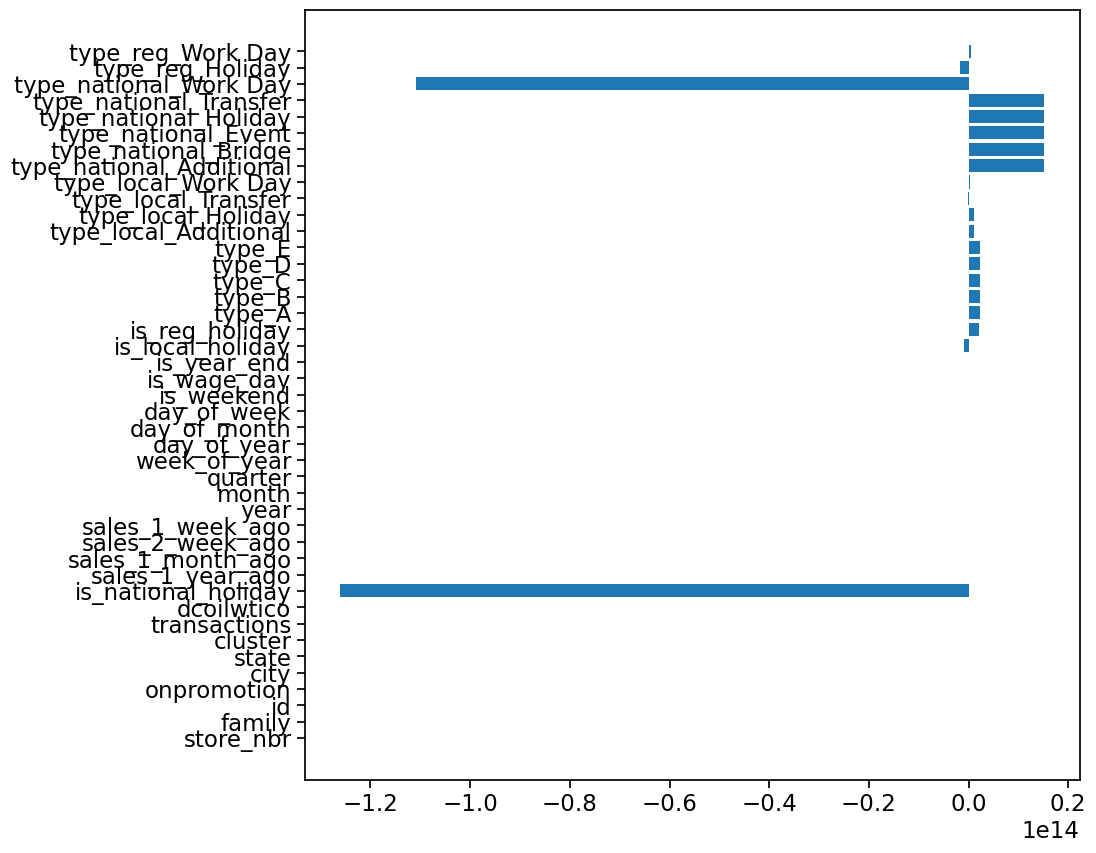

In [36]:
plt.figure(figsize=(10,10))
plt.barh(feature_coeff['Feature'], feature_coeff['coeff'])

In [37]:
test_final.isna().sum()

store_nbr                   0
family                      0
id                          0
onpromotion                 0
city                        0
state                       0
cluster                     0
transactions                0
dcoilwtico                  0
is_national_holiday         0
sales_1_year_ago            0
sales_1_month_ago           0
sales_2_week_ago            0
sales_1_week_ago            0
year                        0
month                       0
quarter                     0
week_of_year                0
day_of_year                 0
day_of_month                0
day_of_week                 0
is_weekend                  0
is_wage_day                 0
is_year_end                 0
is_local_holiday            0
is_reg_holiday              0
type_A                      0
type_B                      0
type_C                      0
type_D                      0
type_E                      0
type_local_Additional       0
type_local_Holiday          0
type_local

In [38]:

submission_rigression = pd.DataFrame(test_encoded.id)
submission_rigression['sales'] = model.predict(test_final)
submission_rigression.sales = submission_rigression.sales.apply(lambda x: 0 if x <= 0 else x)
submission_rigression

,id,sales
3008016,3000888.0,1.104867e+14
3008017,3000889.0,1.104867e+14
3008018,3000890.0,1.104867e+14
3008019,3000891.0,1.104867e+14
3008020,3000892.0,1.104867e+14
...,...,...
3036523,3029395.0,1.104867e+14
3036524,3029396.0,1.104867e+14
3036525,3029397.0,1.104867e+14
3036526,3029398.0,1.104867e+14


In [39]:
submission_rigression.to_csv("submission_rigression.csv", index=False)

### Regilarization for Linear Regression

In [40]:
from sklearn.linear_model import Ridge

In [85]:
#training the model
model = Ridge(normalize=True)
model.fit(train_x.drop(columns=['date']), train_y)
preds_ridge = model.predict(valid_x.drop(columns=['date']))

# results
score_ridge = rmsle(valid_y, preds_ridge)

print('RMSLE for Ridge Regression is', score_ridge)

RMSLE for Ridge Regression is 2.1544500760165564


* Let's tune alpha parameter of Ridge Regression model

In [86]:
for alpha in [0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5]:
    print('----- ----- ----- ----- -----')
    print('At alpha value:', alpha)

    #training the model
    model = Ridge(alpha = alpha, normalize=True)
    model.fit(train_x.drop(columns=['date']), train_y)

    # predictions 
    preds_ridge = model.predict(valid_x.drop(columns=['date']))
    score_ridge = rmsle(valid_y, preds_ridge)

    # results
    print('Ridge Regression error is', score_ridge)

----- ----- ----- ----- -----
At alpha value: 0.0001
Ridge Regression error is 1.3774961184479322
----- ----- ----- ----- -----
At alpha value: 0.005
Ridge Regression error is 1.3834280225620434
----- ----- ----- ----- -----
At alpha value: 0.01
Ridge Regression error is 1.3877437774751098
----- ----- ----- ----- -----
At alpha value: 0.05
Ridge Regression error is 1.4187810578461912
----- ----- ----- ----- -----
At alpha value: 0.1
Ridge Regression error is 1.4506908110658758
----- ----- ----- ----- -----
At alpha value: 0.5
Ridge Regression error is 1.6890261925452157
----- ----- ----- ----- -----
At alpha value: 1
Ridge Regression error is 2.1544500760165564
----- ----- ----- ----- -----
At alpha value: 5
Ridge Regression error is 2.9648055807223646


* Let's use alpha = 0.01

In [87]:
#training the model
model = Ridge(normalize=True, alpha = 0.01)
model.fit(train_x.drop(columns=['date']), train_y)
preds_ridge = model.predict(valid_x.drop(columns=['date']))

# results
score_ridge = rmsle(valid_y, preds_ridge)

print('RMSLE for Ridge Regression is', score_ridge)

RMSLE for Ridge Regression is 1.3877437774751098


* Score reduced, let's try RandomForestRegressor

### RandomForestRegressor

In [88]:
from sklearn.ensemble import RandomForestRegressor
from itertools import product

In [89]:
#training the model
model = RandomForestRegressor()
model.fit(train_x.drop(columns=['date']), train_y)
preds_rf = model.predict(valid_x.drop(columns=['date']))

# results
score_rf = rmsle(valid_y, preds_rf)

print('RMSLE for RandomForestRegressor is', score_rf)

KeyboardInterrupt: 

### Hyperparameter Tuning

In [ ]:
model = RandomForestRegressor(random_state=0)

NameError: name 'RandomForestRegressor' is not defined

In [ ]:
# setting initial values and some bounds for them
n_estimator = [70, 100, 130, 150]
max_depth =  [5, 6, 7, 8, 9]
min_samples_split = [20, 30, 50]


# creating list with all the possible combinations of parameters
parameters = product(n_estimator, max_depth, min_samples_split)
parameters_list = list(parameters)
len(parameters_list)

### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
#training the model
model = DecisionTreeRegressor(random_state=50)
model.fit(train_x, train_y)
preds_dt = model.predict(valid_x)

# results
score_dt = rmsle(valid_y, preds_dt)

print('RMSLE for Decision Tree is', score_dt)

RMSLE for Decision Tree is 0.7773816395709626


In [44]:
model.get_depth(), model.min_samples_split

(70, 2)

In [45]:
# setting initial values and some bounds for them
# n_estimator = [70, 100, 130, 150]
max_depth =  [5, 10, 20, 40]
min_samples_split = [15, 20, 25, 30]


# creating list with all the possible combinations of parameters
parameters = product(max_depth, min_samples_split)
parameters_list = list(parameters)
len(parameters_list)

NameError: name 'product' is not defined

In [204]:
# for md, mss in parameters_list:
#     print(md, mss)

In [58]:
for md, mss in parameters_list:
    print('----- ----- ----- ----- -----')
    print(f"At max_depth value: {md} and min_samples_split value: {mss}")

    #training the model
    model = DecisionTreeRegressor(max_depth = md, min_samples_split = mss,random_state=50)
    model.fit(train_x, train_y)

    # predictions 
    preds_dt = model.predict(valid_x)
    score_dt = rmsle(valid_y, preds_dt)

    # results
    print('Decision Tree error is', score_dt)

----- ----- ----- ----- -----
At max_depth value: 5 and min_samples_split value: 15
Decision Tree error is 1.8123944182690532
----- ----- ----- ----- -----
At max_depth value: 5 and min_samples_split value: 20
Decision Tree error is 1.8123944182690532
----- ----- ----- ----- -----
At max_depth value: 5 and min_samples_split value: 25
Decision Tree error is 1.8123944182690532
----- ----- ----- ----- -----
At max_depth value: 5 and min_samples_split value: 30
Decision Tree error is 1.8123944182690532
----- ----- ----- ----- -----
At max_depth value: 10 and min_samples_split value: 15
Decision Tree error is 0.8147964010596098
----- ----- ----- ----- -----
At max_depth value: 10 and min_samples_split value: 20
Decision Tree error is 0.8147991854310936
----- ----- ----- ----- -----
At max_depth value: 10 and min_samples_split value: 25
Decision Tree error is 0.8148240799627926
----- ----- ----- ----- -----
At max_depth value: 10 and min_samples_split value: 30
Decision Tree error is 0.81476

* Let's use max_depth=20 and min_samples_split=15 in our model

In [205]:
#training the model
model = DecisionTreeRegressor(max_depth=20, min_samples_split=15, random_state=50)
model.fit(train_x, train_y)
preds_dt = model.predict(valid_x)

# results
score_dt = rmsle(valid_y, preds_dt)

print('RMSLE for Decision Tree is', score_dt)

RMSLE for Decision Tree is 0.7003938900384112


* Let's train Decision Tree model on entire data.

In [207]:
#training the model
model = DecisionTreeRegressor(max_depth=20, min_samples_split=15, random_state=50)
model.fit(x, y)
# preds_dt = model.predict(valid_x)

# results
# score_dt = rmsle(valid_y, preds_dt)

# print('RMSLE for Decision Tree is', score_dt)

DecisionTreeRegressor(max_depth=20, min_samples_split=15, random_state=50)

In [208]:

submission_dt = pd.DataFrame(test.id)
submission_dt['sales'] = model.predict(test_final)
# submission_rigression.sales = submission_rigression.sales.apply(lambda x: 0 if x <= 0 else x)
submission_dt

,id,sales
0,3000888,6.500000
1,3000889,0.000000
2,3000890,3.090909
3,3000891,637.909091
4,3000892,0.000000
...,...,...
28507,3029395,489.504350
28508,3029396,69.020708
28509,3029397,0.000000
28510,3029398,0.000000


In [63]:
submission_dt.to_csv("submission_dt.csv", index=False)

In [46]:
import xgboost as xgb

In [47]:
# Create and configure the XGBoost model
model = xgb.XGBRegressor(
    # objective='reg:squarederror',
    # n_estimators=100,  # Number of boosting rounds (trees)
    # max_depth=3,       # Maximum depth of each tree
    # learning_rate=0.1, # Step size shrinkage to prevent overfitting
    # random_state=42
)

# Train the model
model.fit(train_x, train_y)

preds_xgb = model.predict(valid_x)

# results
score_xgb = rmsle(valid_y, preds_xgb)

print('RMSLE for XGBosst is', score_xgb)

RMSLE for XGBosst is 0.7407899887309607


In [51]:
train_x.head()

,store_nbr,family,id,onpromotion,city,state,cluster,transactions,dcoilwtico,is_national_holiday,...,type_local_Transfer,type_local_Work Day,type_national_Additional,type_national_Bridge,type_national_Event,type_national_Holiday,type_national_Transfer,type_national_Work Day,type_reg_Holiday,type_reg_Work Day
0,0.0,0.00000,0.000000e+00,0.0,0.857143,0.8,0.75,0.0,0.792965,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.03125,3.332348e-07,0.0,0.857143,0.8,0.75,0.0,0.792965,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.06250,6.664696e-07,0.0,0.857143,0.8,0.75,0.0,0.792965,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.09375,9.997044e-07,0.0,0.857143,0.8,0.75,0.0,0.792965,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.12500,1.332939e-06,0.0,0.857143,0.8,0.75,0.0,0.792965,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [48]:
# Create and configure the XGBoost model
model = xgb.XGBRegressor(
    # objective='reg:squarederror',
    # n_estimators=100,  # Number of boosting rounds (trees)
    # max_depth=3,       # Maximum depth of each tree
    # learning_rate=0.1, # Step size shrinkage to prevent overfitting
    # random_state=42
)

# Train the model
model.fit(x, y)

# preds_xgb = model.predict(test)

# results
# score_xgb = rmsle(valid_y, preds_xgb)

# print('RMSLE for XGBosst is', score_xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [49]:
test_final.head()

,store_nbr,family,id,onpromotion,city,state,cluster,transactions,dcoilwtico,is_national_holiday,...,type_local_Transfer,type_local_Work Day,type_national_Additional,type_national_Bridge,type_national_Event,type_national_Holiday,type_national_Transfer,type_national_Work Day,type_reg_Holiday,type_reg_Work Day
0,0.0,0.00000,0.000000,0.000000,0.857143,0.8,0.75,0.0,0.319392,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.03125,0.000035,0.000000,0.857143,0.8,0.75,0.0,0.319392,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.06250,0.000070,0.003096,0.857143,0.8,0.75,0.0,0.319392,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.09375,0.000105,0.030960,0.857143,0.8,0.75,0.0,0.319392,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.12500,0.000140,0.000000,0.857143,0.8,0.75,0.0,0.319392,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:

submission_xgb = pd.DataFrame(train[train.train_test_id == 'test'].id.astype('int'))
test_xgb = pd.DataFrame()
for col in x.columns:
    test_xgb[col] = test_final[col]
submission_xgb['sales'] = model.predict(test_xgb)
submission_xgb.sales = submission_xgb.sales.apply(lambda x: 0 if x <= 0 else x)
submission_xgb

,id,sales
3008016,3000888,0.000000
3008017,3000889,0.000000
3008018,3000890,0.000000
3008019,3000891,38830.460938
3008020,3000892,0.000000
...,...,...
3036523,3029395,674.149902
3036524,3029396,49.075386
3036525,3029397,3218.763428
3036526,3029398,185.912811


In [61]:
submission_xgb.to_csv("submission_xgb.csv", index=False)